## SPAM DETECTION PROJECT

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.

A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.

# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install lightgbm

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import xgboost
from xgboost import XGBClassifier
!pip install scikit-plot
import scikitplot as skplt

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import lightgbm 
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
import scikitplot as skplt



In [26]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

!pip install wordcloud

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import joblib

## Importing the DATASET

In [28]:
spam_data=pd.read_csv(r"E:\DS Intenship projects\Project form Mentor\Email spam 02 09\Spam Data\spam.csv", encoding='latin-1')

In [29]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Checkinf some top 5 rows

In [30]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We have some unesessary columns which we should be drop

## EDA

In [31]:
spam_data.shape

(5572, 5)

We have total 5572 rows and 5 columns

### Checking All Column Name

In [32]:
spam_data.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Checking Data Type of All Data

In [33]:
spam_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

As we can see all are object hence we need to treat them so that ML models can understand

### Checking for Null Values

In [34]:
spam_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

We Have null values in some unnecessary column which we are going to drop and there is not missing values present in actual important Data

In [35]:
#droping irrelevant column
spam_data=spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [36]:
#renaming column v1 and v2 for better understanding
spam_data=spam_data.rename(columns={'v1' : 'target','v2' : 'message'})
spam_data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###  Lets check Uniqueness of value

In [37]:
spam_data['target'].nunique()

2

In [38]:
spam_data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [39]:
spam_data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

We can see that How unique values are distributed in all over dataset so that we can get little idea.

# Describing Dataset

In [40]:
spam_data.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [42]:
spam_data.duplicated().sum()

403

In [43]:
# Dropping duplicate rows
spam_data.drop_duplicates(inplace = True)

# Visualization

ham     4516
spam     653
Name: target, dtype: int64


<AxesSubplot:xlabel='target', ylabel='count'>

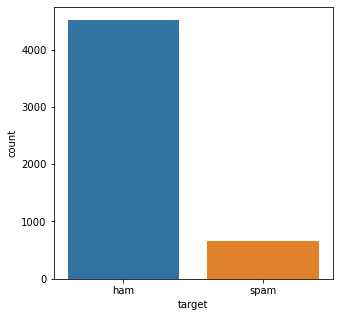

In [44]:
print(spam_data['target'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('target', data=spam_data)

As we can see tnat most of emails are ham which means not spam and there are some spam email present in Data set and they are our targets.

# Using Pie-Plot

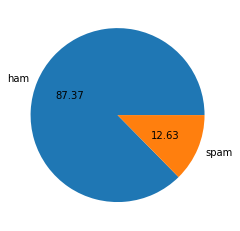

In [45]:
plt.pie(spam_data['target'].value_counts(), labels =['ham', 'spam'], autopct= "%.02f")
plt.show()

The above barplot and pie chart shows that our data is highly imbalanced as spam is 12.63% and ham is 87.37%

In [46]:
# creating coloumn which will contain the no. of characters
spam_data['length'] = spam_data['message'].str.len()

In [53]:
!pip install nltk

In [54]:
import nltk

In [56]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]    | Downloading 

True

In [57]:
# creating coloumn which will fetch no. of words
spam_data['num_words'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [58]:
# creating coloumn which will fetch no. of sentences
spam_data['num_sent'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [59]:
spam_data.head()

,target,message,length,num_words,num_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
#describing data for all messages
spam_data[['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
# mapping labels to 1 and 0
spam_data['target'] = spam_data.target.map({'ham':0, 'spam':1})

In [63]:
spam_data.head()

,target,message,length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [64]:
#describing data for ham messages
spam_data[spam_data['target'] == 0][['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
#describing data for spam messages
spam_data[spam_data['target'] == 1][['length','num_words','num_sent']].describe()

,length,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='length', ylabel='Count'>

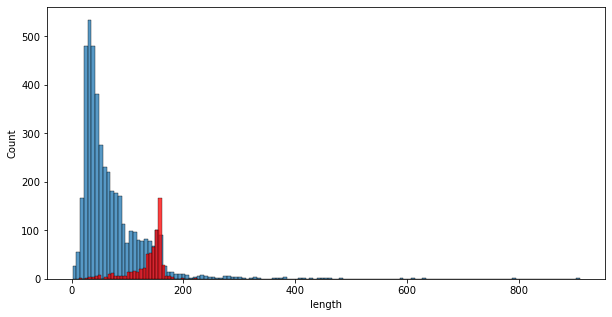

In [66]:
#plotting histogram
plt.figure(figsize=(10,5))
sns.histplot(spam_data[spam_data['target']==0]['length'])
sns.histplot(spam_data[spam_data['target']==1]['length'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

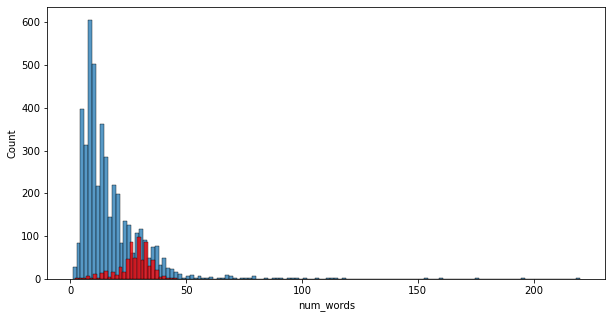

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(spam_data[spam_data['target']==0]['num_words'])
sns.histplot(spam_data[spam_data['target']==1]['num_words'],color = 'red')

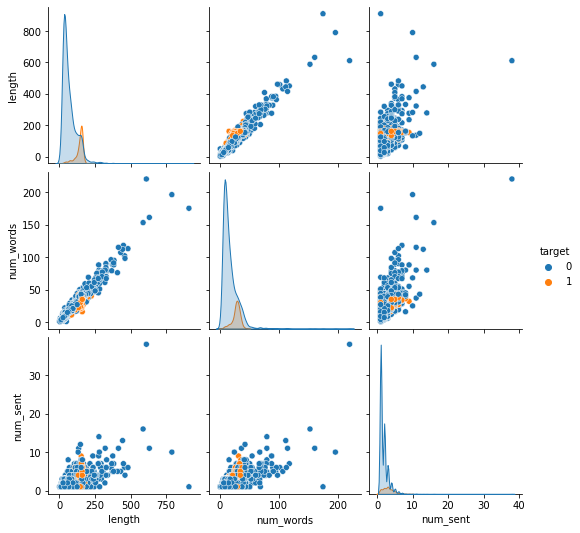

In [68]:
#pairplot for relationship between each column
sns.pairplot(spam_data, hue = 'target')

<AxesSubplot:>

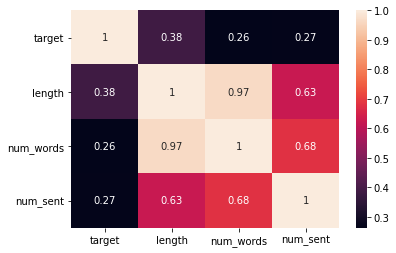

In [69]:
#Using heatmap for corelations between columns 
sns.heatmap(spam_data.corr(), annot = True)

# Data preprocessing

In [70]:
ps= PorterStemmer()

In [71]:
# defining function to apply functions: Lowercase, Tokenize, Alphanumeric, Stopwords, Stemming

def transform_text(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [72]:
spam_data["transformed_text"] = spam_data['message'].apply(transform_text)

In [73]:
spam_data.head()

,target,message,length,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
spam_data.shape

(5169, 6)

# Wordcloud

In [75]:
wc = WordCloud(width = 500, height = 300, min_font_size= 10, background_color= 'black')

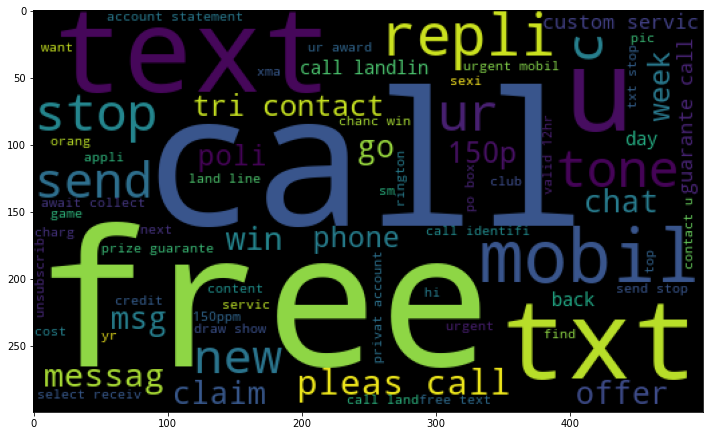

In [76]:
#Generating Word Cloud for Spam Messages
spam_wordcloud = wc.generate(spam_data[spam_data['target']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wordcloud)
plt.show()

In the above Word Cloud, we can clearly see the words like text, free, reply, call, claim..etc. these words are generally seen in the SPAM Msgs.

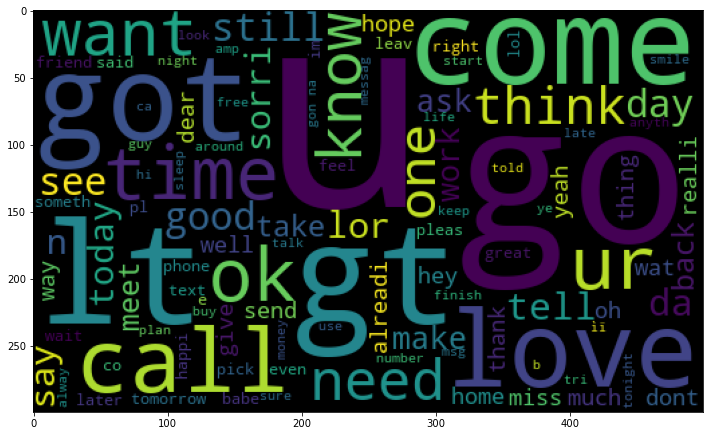

In [77]:
#Generating Word Cloud for Ham Messages
ham_wordcloud = wc.generate(spam_data[spam_data['target']==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wordcloud)
plt.show()

In the above Word Cloud, we can clearly see the words like love, come, go, call, time..etc. these words are generally seen in the Ham Msgs.

### Top 30 words used in HAM and SPAM messaegs

In [78]:
spam_corpus = []
for msg in spam_data[spam_data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

<function matplotlib.pyplot.show(close=None, block=None)>

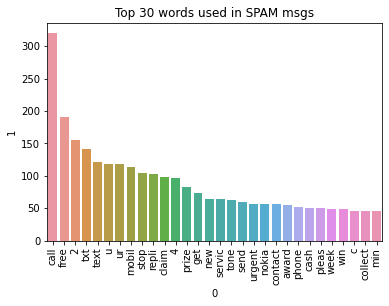

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.title("Top 30 words used in SPAM msgs")
plt.xticks(rotation = "vertical")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

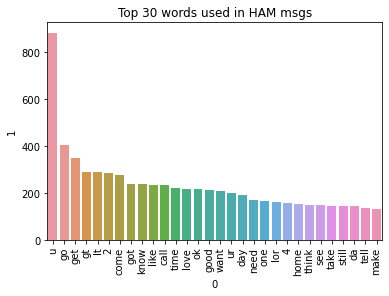

In [80]:
ham_corpus = []
for msg in spam_data[spam_data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.title("Top 30 words used in HAM msgs")
plt.xticks(rotation = "vertical")
plt.show

# Creating Model

In [81]:
X=spam_data['message']
y=spam_data['target']

In [83]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [85]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

## Splitting Data into Train and Test

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [87]:
print (X.shape)
print (X_train.shape)
print (X_test.shape)

(5169,)
(3876,)
(1293,)


### CountVectorizer

In [88]:
#Tokenization (a list of tokens), will be used as the analyzer
def process_text(text):
    
    #1 Remove Punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [89]:
# Text Vectorization
cv = CountVectorizer()

messages_bow = CountVectorizer(analyzer=process_text).fit_transform(spam_data['message'])

X=messages_bow
y=spam_data['target']

In [90]:
#Splitting again data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

In [91]:
# Defining the Classification Machine Learning Algorithms
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()
bnb = BernoulliNB()
mnb = MultinomialNB()
xgb = XGBClassifier(verbosity=0)
sgd= SGDClassifier()

# Creating a function to train and test the model with evaluation metrics
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)*100
    print(f"ACCURACY SCORE PERCENTAGE:", accuracy)
    # Confusion matrix and Classification report
    print(f"CLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
    print(f"CONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}\n")
    print("-"*120)
    print("\n")

### Training and testing of all the classification algorithms

In [92]:
for model in [lr,svc,bnb,mnb,xgb,sgd]:
    BuiltModel(model)

******************************LogisticRegression******************************
ACCURACY SCORE PERCENTAGE: 97.06109822119103
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1129
           1       1.00      0.77      0.87       164

    accuracy                           0.97      1293
   macro avg       0.98      0.88      0.93      1293
weighted avg       0.97      0.97      0.97      1293

CONFUSION MATRIX: 
 [[1129    0]
 [  38  126]]

------------------------------------------------------------------------------------------------------------------------


******************************LinearSVC******************************
ACCURACY SCORE PERCENTAGE: 98.06651198762569
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1129
           1       1.00      0.85      0.92       164

    accuracy                           0.98      

### Cross validation score for best score models

In [93]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,X,y, cv = 5).mean()
    print("Cross validation score:", scores)
    print("\n")
    
for model in [lr,svc,bnb,mnb,xgb,sgd]:
    cross_val(model)    

******************************LogisticRegression******************************
Cross validation score: 0.9729156407226889


******************************LinearSVC******************************
Cross validation score: 0.9775587432896243


******************************BernoulliNB******************************
Cross validation score: 0.9626630665785368


******************************MultinomialNB******************************
Cross validation score: 0.9649817155718168


******************************XGBClassifier******************************
Cross validation score: 0.9692405923667895


******************************SGDClassifier******************************
Cross validation score: 0.9748502511885346




# HyperParameter Tuning

### Linear SVC with GridSearchCV

In [94]:
# Lets select the different parameters for tuning our best model (Linear SVC)
grid_params =  {'C':(0.001, 0.01, 0.1, 1, 10),
                   'penalty':('l1','l2'),
                  'loss':('hinge','squared_hinge')}

# Train the model with given parameters using GridSearchCV
LSVC =  GridSearchCV(svc, grid_params, cv=3)
LSVC.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10),
                         'loss': ('hinge', 'squared_hinge'),
                         'penalty': ('l1', 'l2')})

In [95]:
# Selecting the best parameters found by GridSearchCV
print(LSVC.best_params_)
print(LSVC.best_score_)

{'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.9721362229102167


In [96]:
# Final Model with the best chosen parameters list
best_model = LinearSVC(C= 1, loss= 'squared_hinge', penalty= 'l2')
best_model.fit(X_train,y_train) # fitting data to the best model
pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)*100
# Printing the accuracy score
print("ACCURACY SCORE:", accuracy)
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, pred)}")

ACCURACY SCORE: 98.06651198762569

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1129
           1       1.00      0.85      0.92       164

    accuracy                           0.98      1293
   macro avg       0.99      0.92      0.95      1293
weighted avg       0.98      0.98      0.98      1293


CONFUSION MATRIX: 
 [[1129    0]
 [  25  139]]


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

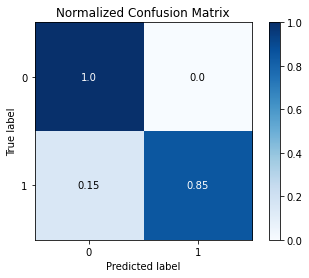

In [97]:
# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

We got final 98% accuracy

# Saving the Model

In [98]:
joblib.dump(best_model, "Email_Spam_Classifier.pkl")

['Email_Spam_Classifier.pkl']

## Best Model

In [99]:
Model = joblib.load("Email_Spam_Classifier.pkl")
# Predicting test data using loaded model
prediction = Model.predict(X_test)
# Analysing Predicted vs Actual results
Email_Spam_Detection_Classifier = pd.DataFrame()
Email_Spam_Detection_Classifier['Predicted Spam Messages Detection'] = prediction
Email_Spam_Detection_Classifier['Actual Spam Messages Detection'] = y
Email_Spam_Detection_Classifier

,Predicted Spam Messages Detection,Actual Spam Messages Detection
0,0,0.0
1,0,0.0
2,1,1.0
3,0,0.0
4,0,0.0
...,...,...
1288,0,0.0
1289,0,0.0
1290,0,0.0
1291,0,0.0


In [100]:
# Converting the dataframe into CSV format and saving it
Email_Spam_Detection_Classifier.to_csv('Email_Spam_Detection_Classifier.csv', index=False)

After applying the hyper parameter tuning the best accuracy score obtained was 98.06651198762569% which can be further improved by obtaining more data and working up through other parameter combinations.

# Thank You